# 05. DheerajKumar97/Employee-Salary-Prediction----python--ML

## Predictions with ML Regression Models (T3) - train.csv

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
import time
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
import xgboost
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures, StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, get_scorer_names
df = pd.read_csv('05_train.csv')

In [2]:
# First 5 rows of the dataset
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
# Last 5 rows of the dataset
df.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365
550067,1006039,P00371644,F,46-50,0,B,4+,1,20,NaN,NaN,490


In [4]:
# All available columns, their counts and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


## Preprocessing

All preprocessing steps are done in almost exactly the same way as the author.

In [5]:
# Let's get the categorical columns by checking the data type
cat_var = [var for var in df.columns if df[var].dtypes == "object"]
cat_var = df[cat_var]
# Also check the unique values in those columns
print("Gender ->", cat_var['Gender'].unique())
print("Age ->", cat_var["Age"].unique())
print("City_Category ->", cat_var["City_Category"].unique())
print("Stay_In_Current_City_Years ->", cat_var['Stay_In_Current_City_Years'].unique())
cat_var.head(10)

Gender -> ['F' 'M']
Age -> ['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']
City_Category -> ['A' 'C' 'B']
Stay_In_Current_City_Years -> ['2' '4+' '3' '1' '0']


,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
0,P00069042,F,0-17,A,2
1,P00248942,F,0-17,A,2
2,P00087842,F,0-17,A,2
3,P00085442,F,0-17,A,2
4,P00285442,M,55+,C,4+
5,P00193542,M,26-35,A,3
6,P00184942,M,46-50,B,2
7,P00346142,M,46-50,B,2
8,P0097242,M,46-50,B,2
9,P00274942,M,26-35,A,1


In [6]:
# Is there any NaN values in these columns?
cat_var.isna().sum()

Product_ID                    0
Gender                        0
Age                           0
City_Category                 0
Stay_In_Current_City_Years    0
dtype: int64

In [7]:
# Give these categorical age ranges some ordered values
def order_age(Age):
    if Age == "0-17":      return 1
    elif Age == "18-25":   return 2
    elif Age == "26-35":   return 3
    elif Age == "36-45":   return 4
    elif Age == "46-50":   return 5
    elif Age == "51-55":   return 6
    elif Age == "55+":     return 7
    else:    return 0
cat_var['Age'] = cat_var['Age'].apply(order_age)

In [8]:
# Give these categorical current city years being stayed some ordered values
def order_stay_in_current_city_years(Stay_In_Current_City_Years):
    if Stay_In_Current_City_Years == "0":      return 1
    elif Stay_In_Current_City_Years == "1":    return 2
    elif Stay_In_Current_City_Years == "2":    return 3
    elif Stay_In_Current_City_Years == "3":    return 4
    elif Stay_In_Current_City_Years == "4+":   return 5
cat_var['Stay_In_Current_City_Years'] = cat_var['Stay_In_Current_City_Years'].apply(order_stay_in_current_city_years)

In [9]:
# Latest status of categorical columns
cat_var

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
0,P00069042,F,1,A,3
1,P00248942,F,1,A,3
2,P00087842,F,1,A,3
3,P00085442,F,1,A,3
4,P00285442,M,7,C,5
...,...,...,...,...,...
550063,P00372445,M,6,B,2
550064,P00375436,F,3,C,4
550065,P00375436,F,3,B,5
550066,P00375436,F,7,C,3


In [10]:
# Let's get the numerical columns by checking the data type (by not being object)
num_var = [var for var in df.columns if df[var].dtypes !="object"]
num_var = df[num_var]
num_var

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,10,0,3,NaN,NaN,8370
1,1000001,10,0,1,6.0,14.0,15200
2,1000001,10,0,12,NaN,NaN,1422
3,1000001,10,0,12,14.0,NaN,1057
4,1000002,16,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...
550063,1006033,13,1,20,NaN,NaN,368
550064,1006035,1,0,20,NaN,NaN,371
550065,1006036,15,1,20,NaN,NaN,137
550066,1006038,1,0,20,NaN,NaN,365


In [11]:
# However, these two columns will be dropped due to having null values, plus user ID has no meaning here.
num_var = num_var.drop(['Product_Category_2','Product_Category_3','User_ID'], axis=1)
num_var

,Occupation,Marital_Status,Product_Category_1,Purchase
0,10,0,3,8370
1,10,0,1,15200
2,10,0,12,1422
3,10,0,12,1057
4,16,0,8,7969
...,...,...,...,...
550063,13,1,20,368
550064,1,0,20,371
550065,15,1,20,137
550066,1,0,20,365


## Prepare Train and Test Sets

In [12]:
# Create several dummy columns from categorical and numerical ones, then merge them with some other columns and purchase
dummy_gender = pd.get_dummies(cat_var['Gender'], prefix='gender')
dummy_age = pd.get_dummies(cat_var['Age'], prefix='age')
dummy_city = pd.get_dummies(cat_var['City_Category'], prefix='city')
dummy_city_years = pd.get_dummies(cat_var['Stay_In_Current_City_Years'], prefix='cityyears')
dummy_occupation = pd.get_dummies(num_var['Occupation'], prefix='occ')
dummy_prod_cat = pd.get_dummies(num_var['Product_Category_1'], prefix='prod_cat1')
df_cons = pd.concat([dummy_gender, dummy_age, dummy_city, dummy_city_years, dummy_occupation, dummy_prod_cat,
                    num_var['Marital_Status'], df['Purchase']], axis=1)
df_cons.head(8)

,gender_F,gender_M,age_1,age_2,age_3,age_4,age_5,age_6,age_7,city_A,...,prod_cat1_13,prod_cat1_14,prod_cat1_15,prod_cat1_16,prod_cat1_17,prod_cat1_18,prod_cat1_19,prod_cat1_20,Marital_Status,Purchase
0,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8370
1,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,15200
2,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1422
3,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1057
4,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,7969
5,0,1,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,15227
6,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,19215
7,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,15854


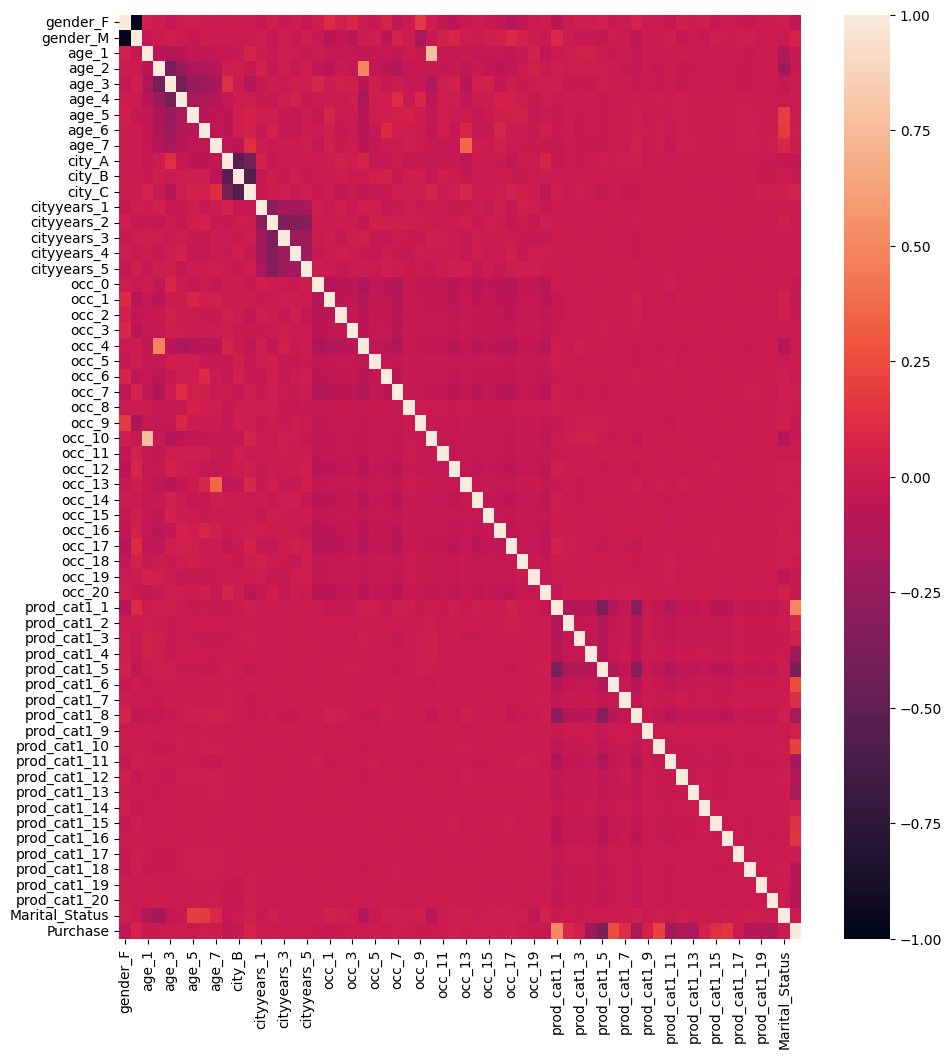

#### COLUMN CORRELATIONS AGAINST PURCHASE ####
gender_F         -0.060346
gender_M          0.060346
age_1            -0.011055
age_2            -0.008831
age_3            -0.001830
age_4             0.006707
age_5            -0.003317
age_6             0.014792
age_7             0.002904
city_A           -0.042465
city_B           -0.019098
city_C            0.061012
cityyears_1      -0.006605
cityyears_2      -0.002030
cityyears_3       0.005358
cityyears_4       0.002090
cityyears_5       0.000988
occ_0            -0.010576
occ_1            -0.019005
occ_2            -0.013975
occ_3            -0.003095
occ_4            -0.003872
occ_5             0.002072
occ_6            -0.000290
occ_7             0.011176
occ_8             0.002839
occ_9            -0.013409
occ_10           -0.009409
occ_11           -0.001464
occ_12            0.025995
occ_13            0.001007
occ_14            0.010772
occ_15            0.015416
occ_16            0.005713
occ_17            0.031099
occ_18  

In [13]:
# Get the correlations of all involved columns in a heat map
plt.figure(figsize=(11,12))
sns.heatmap(df_cons.corr())
plt.show()
print("#### COLUMN CORRELATIONS AGAINST PURCHASE ####")
print(df_cons.corr()['Purchase'])

### Type 3: Use Most Negatively and Positively Correlated Columns Only (>=0.1 or <=-0.1)

In [14]:
# Use 80% of the dataset as training, and 20% as testing
# X = df_cons.drop(columns='Purchase', axis=1)
X = df_cons[['prod_cat1_1','prod_cat1_4','prod_cat1_5','prod_cat1_6','prod_cat1_7','prod_cat1_8','prod_cat1_10','prod_cat1_11',
             'prod_cat1_12','prod_cat1_13','prod_cat1_15','prod_cat1_16','prod_cat1_20']]
Y = df_cons.iloc[:,-1]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=21)
print("TRAIN SIZE:", x_train.shape, " TEST SIZE:", x_test.shape)
print(X.columns)

TRAIN SIZE: (440054, 13)  TEST SIZE: (110014, 13)
Index(['prod_cat1_1', 'prod_cat1_4', 'prod_cat1_5', 'prod_cat1_6',
       'prod_cat1_7', 'prod_cat1_8', 'prod_cat1_10', 'prod_cat1_11',
       'prod_cat1_12', 'prod_cat1_13', 'prod_cat1_15', 'prod_cat1_16',
       'prod_cat1_20'],
      dtype='object')


In [15]:
# Create lists to store results of error values of all regression methods
res_mse, res_rmse, res_mae, res_r2, res_cv_train, res_cv_test = [], [], [], [], [], []

# ML Regression Models

## 1 - Linear Regression

In [16]:
linreg = LinearRegression(fit_intercept=True, positive=False)
linreg.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [17]:
# Fit the training data into the linear reg. model, then make predictions on the test data
s_time = time.time()
linreg.fit(x_train, y_train)
y_pred = linreg.predict(x_test)
print(">>> Fitting and prediction were completed in {:.3f} seconds.".format(time.time()-s_time))

>>> Fitting and prediction were completed in 0.256 seconds.


In [18]:
print("COEF:", linreg.coef_)   # Estimated coefficients for the linear reg.
print("RANK:", linreg.rank_)   # Rank of matrix
print("INTERCEPT:", linreg.intercept_)   # Independent term in the linear model

COEF: [ 3588.79842778 -7686.123047   -3777.38287913  5804.1900579
  6340.41028193 -2516.86077426  9668.33531425 -5337.31568374
 -8665.07443125 -9294.69233629  4788.46957069  4766.29768973
 -9644.20824123]
RANK: 13
INTERCEPT: 10017.305730157503


In [19]:
# Compare the predicted values against the actual ones for the top 20 rows
for i in range(20):
    print("{:20} | {:8}".format(y_pred[i], y_test.iloc[i]))

   7500.444955893916 |     5977
  13606.104157933918 |    19203
  13606.104157933918 |    15582
   7500.444955893916 |     5942
  14783.603419886756 |    20266
    6239.92285102512 |     8611
   2331.182683155007 |     2762
   7500.444955893916 |     3935
  10017.305730157503 |     5722
   7500.444955893916 |     6038
    6239.92285102512 |     5191
  13606.104157933918 |    15719
  13606.104157933918 |    15499
    6239.92285102512 |     8612
   7500.444955893916 |     7908
    6239.92285102512 |     8584
   7500.444955893916 |     3951
    6239.92285102512 |     8770
   7500.444955893916 |     7899
  19685.641044405926 |    23301


In [20]:
# Results of metrics
mse, rmse, mae, r2 = mean_squared_error(y_test, y_pred), mean_squared_error(y_test, y_pred, squared=False), \
    mean_absolute_error(y_test, y_pred), r2_score(y_test, y_pred)
print("MSE:", mse)         # Mean squared error
print("RMSE:", rmse)       # Root mean squared error
print("MAE:", mae)         # Mean absolute error
print("R2 SCORE:", r2)     # R2 score
res_mse.append(mse)
res_rmse.append(rmse)
res_mae.append(mae)
res_r2.append(r2)
print("\n# CROSS VALIDATION #")
cross_val = cross_validate(linreg, X, Y, cv=5, return_train_score=True)    # 5-fold Cross Validation
# The time in seconds for fitting the estimator on the train set for each cv split
print("FITTING TIME:", cross_val['fit_time'], "->", cross_val['fit_time'].mean())
# The time in seconds for scoring the estimator on the test set for each cv split
print("SCORING TIME:", cross_val['score_time'], "->", cross_val['score_time'].mean())
# The score array for train scores for each cv split
print("TRAIN SCORE:", cross_val['train_score'], "->", cross_val['train_score'].mean())
res_cv_train.append(cross_val['train_score'].mean())
# The score array for test score for each cv split
print("TEST SCORE:", cross_val['test_score'], "->", cross_val['test_score'].mean())
res_cv_test.append(cross_val['test_score'].mean())

MSE: 9820782.144167535
RMSE: 3133.8127168303367
MAE: 2369.382428001083
R2 SCORE: 0.6098994737104695

# CROSS VALIDATION #
FITTING TIME: [0.26431561 0.28954363 0.30395865 0.25783896 0.2605679 ] -> 0.27524495124816895
SCORING TIME: [0.         0.01562285 0.         0.0069921  0.00651073] -> 0.005825138092041016
TRAIN SCORE: [0.60900207 0.60873675 0.6083145  0.60861667 0.61218137] -> 0.6093702717760682
TEST SCORE: [0.61021332 0.61129013 0.61293464 0.61171054 0.50993865] -> 0.5912174563518633


## 2 - Lasso Regression

In [21]:
lasso = Lasso(alpha=1.0, fit_intercept=True, positive=False, tol=0.0001, selection='cyclic')
lasso.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'normalize': 'deprecated',
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [22]:
# Fit the training data into the lasso model, then make predictions on the test data
s_time = time.time()
lasso.fit(x_train, y_train)
y_pred = lasso.predict(x_test)
print(">>> Fitting and prediction were completed in {:.3f} seconds.".format(time.time()-s_time))

>>> Fitting and prediction were completed in 0.342 seconds.


In [23]:
print("COEF:", lasso.coef_)   # Parameter vector (w in the cost function function formula)
print("INTERCEPT:", lasso.intercept_)   # Independent term in decision function
print("ITERATIONS:", lasso.n_iter_)   # Number of iterations run by the coord. descent solver to reach the specified tolerance

COEF: [ 3596.27285764 -7628.20818394 -3762.39794418  5788.66618092
  6204.02858254 -2500.72320281  9572.25442067 -5303.32614054
 -8516.04886572 -9183.5017021   4712.94683303  4721.84657367
 -9416.25313711]
INTERCEPT: 10006.019262166892
ITERATIONS: 33


In [24]:
# Compare the predicted values against the actual ones for the top 20 rows
for i in range(20):
    print("{:20} | {:8}".format(y_pred[i], y_test.iloc[i]))

   7505.296059356693 |     5977
  13602.292119802201 |    19203
  13602.292119802201 |    15582
   7505.296059356693 |     5942
  14727.865835840114 |    20266
   6243.621317984954 |     8611
  2377.8110782265876 |     2762
   7505.296059356693 |     3935
  10006.019262166892 |     5722
   7505.296059356693 |     6038
   6243.621317984954 |     5191
  13602.292119802201 |    15719
  13602.292119802201 |    15499
   6243.621317984954 |     8612
   7505.296059356693 |     7908
   6243.621317984954 |     8584
   7505.296059356693 |     3951
   6243.621317984954 |     8770
   7505.296059356693 |     7899
  19578.273682839914 |    23301


In [25]:
# Results of metrics
mse, rmse, mae, r2 = mean_squared_error(y_test, y_pred), mean_squared_error(y_test, y_pred, squared=False), \
    mean_absolute_error(y_test, y_pred), r2_score(y_test, y_pred)
adj_r2 = 1-(1-lasso.score(X, Y))*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("MSE:", mse)          
print("RMSE:", rmse)       
print("MAE:", mae)        
print("R2 SCORE:", r2)
print("ADJUSTED R2 SCORE:", adj_r2)
res_mse.append(mse)
res_rmse.append(rmse)
res_mae.append(mae)
res_r2.append(r2)
cross_val = cross_validate(lasso, X, Y, cv=5, return_train_score=True)
print("# CROSS VALIDATION #")
print("FITTING TIME:", cross_val['fit_time'], "->", cross_val['fit_time'].mean())
print("SCORING TIME:", cross_val['score_time'], "->", cross_val['score_time'].mean())
print("TRAIN SCORE:", cross_val['train_score'], "->", cross_val['train_score'].mean())
res_cv_train.append(cross_val['train_score'].mean())
print("TEST SCORE:", cross_val['test_score'], "->", cross_val['test_score'].mean())
res_cv_test.append(cross_val['test_score'].mean())

MSE: 9821523.916482335
RMSE: 3133.9310644113307
MAE: 2370.908842641507
R2 SCORE: 0.6098700090745431
ADJUSTED R2 SCORE: 0.6092264196055752
# CROSS VALIDATION #
FITTING TIME: [0.39762926 0.41358638 0.38150454 0.37824011 0.34748745] -> 0.38368954658508303
SCORING TIME: [0.01082373 0.00702214 0.00304055 0.0071249  0.01303649] -> 0.008209562301635743
TRAIN SCORE: [0.60896541 0.60870006 0.60827758 0.6085799  0.61215151] -> 0.60933489322251
TEST SCORE: [0.61015673 0.61122194 0.61287459 0.61162191 0.50994325] -> 0.5911636841818977


## 3 - Ridge Regression

In [26]:
ridge = Ridge(alpha=1.0, fit_intercept=True, positive=True, tol=0.0001, solver='auto')
ridge.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': 'deprecated',
 'positive': True,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.0001}

In [27]:
# Fit the training data into the ridge model, then make predictions on the test data
s_time = time.time()
ridge.fit(x_train, y_train)
y_pred = ridge.predict(x_test)
print(">>> Fitting and prediction were completed in {:.3f} seconds.".format(time.time()-s_time))

>>> Fitting and prediction were completed in 0.248 seconds.


In [28]:
print("COEF:", ridge.coef_)   # Weight vector(s)
print("INTERCEPT:", ridge.intercept_)   # Independent term in decision function
print("ITERATIONS:", ridge.n_iter_)   # Actual number of iterations for each target. (Only for 'sag' & 'lsqr' solvers)

COEF: [ 7174.37297831     0.             0.          9435.24613776
  9789.20226063  1070.06414661 13415.70109084     0.
     0.             0.          8430.78572365  8295.09658142
     0.        ]
INTERCEPT: 6423.977821922474
ITERATIONS: None


In [29]:
# Compare the predicted values against the actual ones for the top 20 rows
for i in range(20):
    print("{:20} | {:8}".format(y_pred[i], y_test.iloc[i]))

   7494.041968531849 |     5977
  13598.350800230886 |    19203
  13598.350800230886 |    15582
   7494.041968531849 |     5942
   14719.07440334381 |    20266
   6423.977821922474 |     8611
   6423.977821922474 |     2762
   7494.041968531849 |     3935
   6423.977821922474 |     5722
   7494.041968531849 |     6038
   6423.977821922474 |     5191
  13598.350800230886 |    15719
  13598.350800230886 |    15499
   6423.977821922474 |     8612
   7494.041968531849 |     7908
   6423.977821922474 |     8584
   7494.041968531849 |     3951
   6423.977821922474 |     8770
   7494.041968531849 |     7899
  19839.678912764848 |    23301


In [30]:
# Results of metrics
mse, rmse, mae, r2 = mean_squared_error(y_test, y_pred), mean_squared_error(y_test, y_pred, squared=False), \
    mean_absolute_error(y_test, y_pred), r2_score(y_test, y_pred)
adj_r2 = 1-(1-ridge.score(X, Y))*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("MSE:", mse)        
print("RMSE:", rmse)      
print("MAE:", mae)        
print("R2 SCORE:", r2)  
print("ADJUSTED R2 SCORE:", adj_r2)
res_mse.append(mse)
res_rmse.append(rmse)
res_mae.append(mae)
res_r2.append(r2)
cross_val = cross_validate(ridge, X, Y, cv=5, return_train_score=True)
print("# CROSS VALIDATION #")
print("FITTING TIME:", cross_val['fit_time'], "->", cross_val['fit_time'].mean())
print("SCORING TIME:", cross_val['score_time'], "->", cross_val['score_time'].mean())
print("TRAIN SCORE:", cross_val['train_score'], "->", cross_val['train_score'].mean())
res_cv_train.append(cross_val['train_score'].mean())
print("TEST SCORE:", cross_val['test_score'], "->", cross_val['test_score'].mean())
res_cv_test.append(cross_val['test_score'].mean())

MSE: 12216471.913521418
RMSE: 3495.2069915130087
MAE: 2719.236583554264
R2 SCORE: 0.5147380266757831
ADJUSTED R2 SCORE: 0.5145099772588506
# CROSS VALIDATION #
FITTING TIME: [0.2777524  0.25140452 0.26705384 0.2775991  0.28268147] -> 0.2712982654571533
SCORING TIME: [0.         0.01565027 0.         0.         0.        ] -> 0.003130054473876953
TRAIN SCORE: [0.51513292 0.51441488 0.51425234 0.51455371 0.51441687] -> 0.5145541437244432
TEST SCORE: [0.5119161  0.51483274 0.51542313 0.51425585 0.51250939] -> 0.5137874451285732


## 4 - Polynomial Regression

In [31]:
poly_feat = PolynomialFeatures(degree=2, include_bias=True, interaction_only=True, order='C')
poly_feat.get_params()

{'degree': 2, 'include_bias': True, 'interaction_only': True, 'order': 'C'}

In [32]:
# Fit then transform for both training and test data (the number of columns must increase)
x_poly_train = poly_feat.fit_transform(x_train)
x_poly_test = poly_feat.fit_transform(x_test)
print(x_poly_train.shape, x_poly_test.shape)

(440054, 92) (110014, 92)


### Polynomial Regression with Ridge

In [33]:
ridge = Ridge(max_iter=1000)
s_time = time.time()
ridge.fit(x_poly_train, y_train)
y_poly_pred = ridge.predict(x_poly_test)
print(">>> Fitting and prediction were completed in {:.3f} seconds.".format(time.time()-s_time))

>>> Fitting and prediction were completed in 0.429 seconds.


In [34]:
print("COEF:", ridge.coef_)   # Weight vector(s)
print("INTERCEPT:", ridge.intercept_)   # Independent term in decision function. Set to 0.0 if fit_intercept = False
# Actual number of iterations for each target. Only for 'sag' & 'lsqr' solvers. Other solvers will return None
print("ITERATIONS:", ridge.n_iter_)
print("FEATURES:", ridge.n_features_in_)   # Number of features seen during fit

COEF: [    0.          3589.05774751 -7685.01928203 -3777.06032436
  5804.12706804  6338.5738389  -2516.54181898  9666.26784651
 -5336.74914252 -8662.07198842 -9292.2915398   4787.8163511
  4765.98532756 -9639.17090994     0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.          

In [35]:
# Results of metrics
mse, rmse, mae, r2 = mean_squared_error(y_test, y_poly_pred), mean_squared_error(y_test, y_poly_pred, squared=False), \
    mean_absolute_error(y_test, y_poly_pred), r2_score(y_test, y_poly_pred)
print("MSE:", mse)        
print("RMSE:", rmse)       
print("MAE:", mae)          
print("R2 SCORE:", r2)      
res_mse.append(mse)
res_rmse.append(rmse)
res_mae.append(mae)
res_r2.append(r2)
cross_val = cross_validate(ridge, X, Y, cv=5, return_train_score=True)
print("# CROSS VALIDATION #")
print("FITTING TIME:", cross_val['fit_time'], "->", cross_val['fit_time'].mean())
print("SCORING TIME:", cross_val['score_time'], "->", cross_val['score_time'].mean())
print("TRAIN SCORE:", cross_val['train_score'], "->", cross_val['train_score'].mean())
res_cv_train.append(cross_val['train_score'].mean())
print("TEST SCORE:", cross_val['test_score'], "->", cross_val['test_score'].mean())
res_cv_test.append(cross_val['test_score'].mean())

MSE: 9820780.490466485
RMSE: 3133.812452982227
MAE: 2369.3864609205075
R2 SCORE: 0.6098995393986847
# CROSS VALIDATION #
FITTING TIME: [0.09717894 0.10359645 0.10979271 0.12563229 0.10294175] -> 0.10782842636108399
SCORING TIME: [0.01560402 0.         0.         0.01562357 0.        ] -> 0.00624551773071289
TRAIN SCORE: [0.60900205 0.60873674 0.60831449 0.60861665 0.61218137] -> 0.6093702602333417
TEST SCORE: [0.61021263 0.61128935 0.61293368 0.61170932 0.50994352] -> 0.5912177006686847


## 5 - Random Forest Regression

In [36]:
rforest = RandomForestRegressor(n_estimators=25, criterion='friedman_mse', max_depth=25, min_samples_split=2, 
                                min_samples_leaf=2, min_weight_fraction_leaf=0.1, max_features=None, max_leaf_nodes=None,
                                bootstrap=True, warm_start=False, ccp_alpha=0.2, max_samples=None, oob_score=True)
# rforest = RandomForestRegressor(n_estimators=40, criterion='friedman_mse', max_depth=20, min_samples_split=4, 
#                                 min_samples_leaf=4, min_weight_fraction_leaf=0.1, max_features=None, max_leaf_nodes=None,
#                                 bootstrap=True, warm_start=False, ccp_alpha=0.2, max_samples=None)
rforest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.2,
 'criterion': 'friedman_mse',
 'max_depth': 25,
 'max_features': None,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.1,
 'n_estimators': 25,
 'n_jobs': None,
 'oob_score': True,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [37]:
# Fit the training data into the random forest, then make predictions on the test data
s_time = time.time()
rforest.fit(x_train, y_train)
y_pred = rforest.predict(x_test)
print(">>> Fitting and prediction were completed in {:.3f} seconds.".format(time.time()-s_time))

>>> Fitting and prediction were completed in 2.934 seconds.


In [38]:
# Results of metrics
mse, rmse, mae, r2 = mean_squared_error(y_test, y_pred), mean_squared_error(y_test, y_pred, squared=False), \
    mean_absolute_error(y_test, y_pred), r2_score(y_test, y_pred)
print("MSE:", mse)        
print("RMSE:", rmse)      
print("MAE:", mae)        
print("R2 SCORE:", r2)  
res_mse.append(mse)
res_rmse.append(rmse)
res_mae.append(mae)
res_r2.append(r2)
cross_val = cross_validate(rforest, X, Y, cv=5, return_train_score=True)
print("# CROSS VALIDATION #")
print("FITTING TIME:", cross_val['fit_time'], "->", cross_val['fit_time'].mean())
print("SCORING TIME:", cross_val['score_time'], "->", cross_val['score_time'].mean())
print("TRAIN SCORE:", cross_val['train_score'], "->", cross_val['train_score'].mean())
res_cv_train.append(cross_val['train_score'].mean())
print("TEST SCORE:", cross_val['test_score'], "->", cross_val['test_score'].mean())
res_cv_test.append(cross_val['test_score'].mean())

MSE: 17166166.907830786
RMSE: 4143.207321367202
MAE: 3137.745356487643
R2 SCORE: 0.3181265354617694
# CROSS VALIDATION #
FITTING TIME: [2.55354619 2.74508214 2.66982746 2.76108408 2.45665336] -> 2.637238645553589
SCORING TIME: [0.09663129 0.07867622 0.09120822 0.07868052 0.09307289] -> 0.08765382766723633
TRAIN SCORE: [0.31455619 0.31399751 0.31506434 0.31471467 0.32703154] -> 0.31707284899909166
TEST SCORE: [0.32611472 0.3282634  0.32379379 0.32520713 0.27378575] -> 0.31543295775745805


## 6 - Multi-Layer Perceptron Regression

In [39]:
mlpr = MLPRegressor(max_iter=250, hidden_layer_sizes=(100,), activation='relu', solver='adam', alpha=0.1,
                    learning_rate='adaptive', learning_rate_init=0.01, shuffle=True, tol=0.01, max_fun=15000,
                    beta_1=0.9, beta_2=0.999, epsilon=1e-9, n_iter_no_change=10, early_stopping=False, validation_fraction=0.5)
mlpr.get_params()

{'activation': 'relu',
 'alpha': 0.1,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-09,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'adaptive',
 'learning_rate_init': 0.01,
 'max_fun': 15000,
 'max_iter': 250,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.01,
 'validation_fraction': 0.5,
 'verbose': False,
 'warm_start': False}

In [40]:
# Fit the training data into the multi-layer perceptron regression model, then make predictions on the test data
s_time = time.time()
mlpr.fit(x_train, y_train)
y_pred = mlpr.predict(x_test)
print(">>> Fitting and prediction were completed in {:.3f} seconds.".format(time.time()-s_time))

>>> Fitting and prediction were completed in 35.050 seconds.


In [41]:
# Compare the predicted values against the actual ones for the first 20 rows
for i in range(20):
    print("{:20} | {:8}".format(y_pred[i], y_test.iloc[i]))

   7461.337274821223 |     5977
  13584.257702363819 |    19203
  13584.257702363819 |    15582
   7461.337274821223 |     5942
  14818.119240401144 |    20266
  6266.9868595893495 |     8611
  2345.1867898250684 |     2762
   7461.337274821223 |     3935
  10005.621583004055 |     5722
   7461.337274821223 |     6038
  6266.9868595893495 |     5191
  13584.257702363819 |    15719
  13584.257702363819 |    15499
  6266.9868595893495 |     8612
   7461.337274821223 |     7908
  6266.9868595893495 |     8584
   7461.337274821223 |     3951
  6266.9868595893495 |     8770
   7461.337274821223 |     7899
  19679.190976009584 |    23301


In [42]:
# Results of metrics
mse, rmse, mae, r2 = mean_squared_error(y_test, y_pred), mean_squared_error(y_test, y_pred, squared=False), \
    mean_absolute_error(y_test, y_pred), r2_score(y_test, y_pred)
print("MSE:", mse)         
print("RMSE:", rmse)        
print("MAE:", mae)           
print("R2 SCORE:", r2)      
res_mse.append(mse)
res_rmse.append(rmse)
res_mae.append(mae)
res_r2.append(r2)
# Cross validation is disabled due to taking lots of time for fitting
# cross_val = cross_validate(mlpr, X, Y, cv=5, return_train_score=True)
# print("# CROSS VALIDATION #")
# print("FITTING TIME:", cross_val['fit_time'], "->", cross_val['fit_time'].mean())
# print("SCORING TIME:", cross_val['score_time'], "->", cross_val['score_time'].mean())
# print("TRAIN SCORE:", cross_val['train_score'], "->", cross_val['train_score'].mean())
# print("TEST SCORE:", cross_val['test_score'], "->", cross_val['test_score'].mean())

MSE: 9821469.035365995
RMSE: 3133.9223084444825
MAE: 2371.5314381187045
R2 SCORE: 0.6098721890589938


## 7 - Gradient Boosting

In [43]:
gradBoost = GradientBoostingRegressor()
gradBoost.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [44]:
# Fit the training data into the Gradient boosting regression model, then make predictions on the test data
s_time = time.time()
gradBoost.fit(x_train, y_train)
y_pred = gradBoost.predict(x_test)
print(">>> Fitting and prediction were completed in {:.3f} seconds.".format(time.time()-s_time))

>>> Fitting and prediction were completed in 11.291 seconds.


In [45]:
print("INIT:", gradBoost.init_)  # The estimator that provides the initial predictions
print("ESTIMATORS (FIRST 5):\n{}".format(gradBoost.estimators_[:5]))  # The collection of fitted sub-estimators
# The number of estimators as selected by early stopping (if 'n_iter_no_change' is specified).
# Otherwise, it is set to 'n_estimators'
print("# OF ESTIMATORS:", gradBoost.n_estimators_)
print("# OF FEATURES:", gradBoost.n_features_in_)  # Number of features seen during fit
print("MAX FEATURES:", gradBoost.max_features_)  # The inferred value of max_features
print("FEATURE IMPORTANCES:", gradBoost.feature_importances_)  # The impurity-based feature importances
# The i'th score 'train_score[i]' is the loss of the model at iteration i on the in-bag sample.
# If subsample == 1, this is the loss on the training data.
print("TRAIN SCORE:\n{}".format(gradBoost.train_score_))

INIT: DummyRegressor()
ESTIMATORS (FIRST 5):
[[DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                        random_state=RandomState(MT19937) at 0x272DD705340)]
 [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                        random_state=RandomState(MT19937) at 0x272DD705340)]
 [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                        random_state=RandomState(MT19937) at 0x272DD705340)]
 [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                        random_state=RandomState(MT19937) at 0x272DD705340)]
 [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                        random_state=RandomState(MT19937) at 0x272DD705340)]]
# OF ESTIMATORS: 100
# OF FEATURES: 13
MAX FEATURES: 13
FEATURE IMPORTANCES: [0.37942052 0.05431456 0.07664536 0.14673704 0.02703926 0.02199726
 0.08177243 0.04586355 0.02542327 0.04002616 0.02938671 0.05083372
 0.02054015]
TRAIN SCORE:
[23264138.8820153

In [46]:
# Compare the predicted values against the actual ones for the first 20 rows
for i in range(20):
    print("{:20} | {:8}".format(y_pred[i], y_test.iloc[i]))

   7628.135872479734 |     5977
  13689.863419180974 |    19203
  13689.863419180974 |    15582
   7628.135872479734 |     5942
  14346.976977096321 |    20266
   6331.330705753394 |     8611
   2751.195947157594 |     2762
   7628.135872479734 |     3935
   9214.970819910195 |     5722
   7628.135872479734 |     6038
   6331.330705753394 |     5191
  13689.863419180974 |    15719
  13689.863419180974 |    15499
   6331.330705753394 |     8612
   7628.135872479734 |     7908
   6331.330705753394 |     8584
   7628.135872479734 |     3951
   6331.330705753394 |     8770
   7628.135872479734 |     7899
  19087.344998079578 |    23301


In [47]:
# Results of metrics
mse, rmse, mae, r2 = mean_squared_error(y_test, y_pred), mean_squared_error(y_test, y_pred, squared=False), \
    mean_absolute_error(y_test, y_pred), r2_score(y_test, y_pred)
print("MSE:", mse)         
print("RMSE:", rmse)        
print("MAE:", mae)           
print("R2 SCORE:", r2)      
res_mse.append(mse)
res_rmse.append(rmse)
res_mae.append(mae)
res_r2.append(r2)
cross_val = cross_validate(gradBoost, X, Y, cv=5, return_train_score=True)
print("# CROSS VALIDATION #")
print("FITTING TIME:", cross_val['fit_time'], "->", cross_val['fit_time'].mean())
print("SCORING TIME:", cross_val['score_time'], "->", cross_val['score_time'].mean())
print("TRAIN SCORE:", cross_val['train_score'], "->", cross_val['train_score'].mean())
res_cv_train.append(cross_val['train_score'].mean())
print("TEST SCORE:", cross_val['test_score'], "->", cross_val['test_score'].mean())
res_cv_test.append(cross_val['test_score'].mean())

MSE: 9924217.050486868
RMSE: 3150.2725359065157
MAE: 2397.716035477248
R2 SCORE: 0.6057908384918538
# CROSS VALIDATION #
FITTING TIME: [10.26841497 10.38622069 10.34411931 10.34307837 10.00654578] -> 10.269675827026367
SCORING TIME: [0.10993814 0.10998869 0.10068703 0.09434223 0.10044909] -> 0.10308103561401367
TRAIN SCORE: [0.6045721  0.60422261 0.60370018 0.60406105 0.60924019] -> 0.605159223779482
TEST SCORE: [0.60310378 0.60447306 0.60589823 0.60451182 0.52676994] -> 0.5889513643614563


## 8 - XGBoost

In [48]:
xgb = xgboost.XGBRegressor()
xgb.get_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [49]:
# Fit the training data into the extreme gradient boosting regression model, then make predictions on the test data
s_time = time.time()
xgb.fit(x_train, y_train)
y_pred = xgb.predict(x_test)
print(">>> Fitting and prediction were completed in {:.3f} seconds.".format(time.time()-s_time))

>>> Fitting and prediction were completed in 1.264 seconds.


In [50]:
# Compare the predicted values against the actual ones for the first 20 rows
for i in range(20):
    print("{:20} | {:8}".format(y_pred[i], y_test.iloc[i]))

     7500.5673828125 |     5977
    13606.1884765625 |    19203
    13606.1884765625 |    15582
     7500.5673828125 |     5942
      14784.08984375 |    20266
     6240.0205078125 |     8611
    2331.61865234375 |     2762
     7500.5673828125 |     3935
    10015.5986328125 |     5722
     7500.5673828125 |     6038
     6240.0205078125 |     5191
    13606.1884765625 |    15719
    13606.1884765625 |    15499
     6240.0205078125 |     8612
     7500.5673828125 |     7908
     6240.0205078125 |     8584
     7500.5673828125 |     3951
     6240.0205078125 |     8770
     7500.5673828125 |     7899
     19686.310546875 |    23301


In [51]:
# Results of metrics
mse, rmse, mae, r2 = mean_squared_error(y_test, y_pred), mean_squared_error(y_test, y_pred, squared=False), \
    mean_absolute_error(y_test, y_pred), r2_score(y_test, y_pred)
print("MSE:", mse)         
print("RMSE:", rmse)        
print("MAE:", mae)           
print("R2 SCORE:", r2)      
res_mse.append(mse)
res_rmse.append(rmse)
res_mae.append(mae)
res_r2.append(r2)
cross_val = cross_validate(xgb, X, Y, cv=5, return_train_score=True)
print("# CROSS VALIDATION #")
print("FITTING TIME:", cross_val['fit_time'], "->", cross_val['fit_time'].mean())
print("SCORING TIME:", cross_val['score_time'], "->", cross_val['score_time'].mean())
print("TRAIN SCORE:", cross_val['train_score'], "->", cross_val['train_score'].mean())
res_cv_train.append(cross_val['train_score'].mean())
print("TEST SCORE:", cross_val['test_score'], "->", cross_val['test_score'].mean())
res_cv_test.append(cross_val['test_score'].mean())

MSE: 9820788.858537674
RMSE: 3133.813788108297
MAE: 2369.380070423732
R2 SCORE: 0.6098992070026569
# CROSS VALIDATION #
FITTING TIME: [1.25452375 1.15832973 1.18847346 1.20438552 1.31382251] -> 1.2239069938659668
SCORING TIME: [0.08953381 0.04727244 0.0468719  0.04727149 0.06289339] -> 0.058768606185913085
TRAIN SCORE: [0.60900205 0.60873674 0.60831448 0.60861665 0.61218137] -> 0.60937025824311
TEST SCORE: [0.61020651 0.61128564 0.61292793 0.61170608 0.50995491] -> 0.5912162146065383


## Results of Metrics of All ML Methods Together

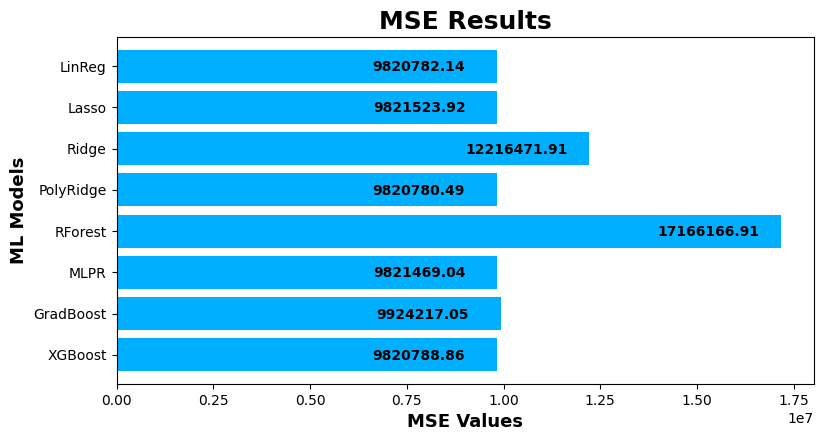

In [52]:
methods = ['LinReg', 'Lasso', 'Ridge', 'PolyRidge', 'RForest', 'MLPR', 'GradBoost', 'XGBoost']
plt.figure(figsize=(9,4.5))
plt.barh(range(8), res_mse, color='#00afff')
plt.title("MSE Results", fontsize=18, fontweight='bold')
plt.yticks(range(8), methods)
plt.ylim(7.7,-0.7)
plt.xlabel('MSE Values', fontsize=13, fontweight='bold')
plt.ylabel('ML Models', fontsize=13, fontweight='bold')
for i in range(8):
    plt.text(res_mse[i]-3200000, i+0.12, "{:.2f}".format(res_mse[i]), fontweight='bold')
plt.show()

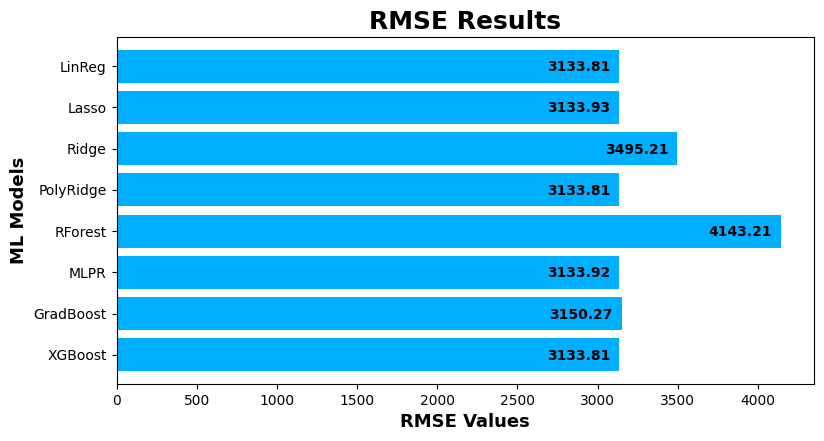

In [53]:
plt.figure(figsize=(9,4.5))
plt.barh(range(8), res_rmse, color='#00afff')
plt.title("RMSE Results", fontsize=18, fontweight='bold')
plt.yticks(range(8), methods)
plt.ylim(7.7,-0.7)
plt.xlabel('RMSE Values', fontsize=13, fontweight='bold')
plt.ylabel('ML Models', fontsize=13, fontweight='bold')
for i in range(8):
    plt.text(res_rmse[i]-450, i+0.12, "{:.2f}".format(res_rmse[i]), fontweight='bold')
plt.show()

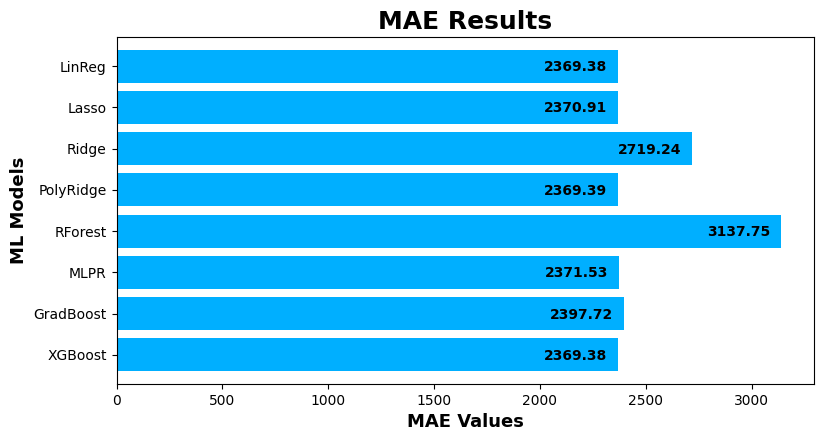

In [54]:
plt.figure(figsize=(9,4.5))
plt.barh(range(8), res_mae, color='#00afff')
plt.title("MAE Results", fontsize=18, fontweight='bold')
plt.yticks(range(8), methods)
plt.ylim(7.7,-0.7)
plt.xlabel('MAE Values', fontsize=13, fontweight='bold')
plt.ylabel('ML Models', fontsize=13, fontweight='bold')
for i in range(8):
    plt.text(res_mae[i]-350, i+0.12, "{:.2f}".format(res_mae[i]), fontweight='bold')
plt.show()

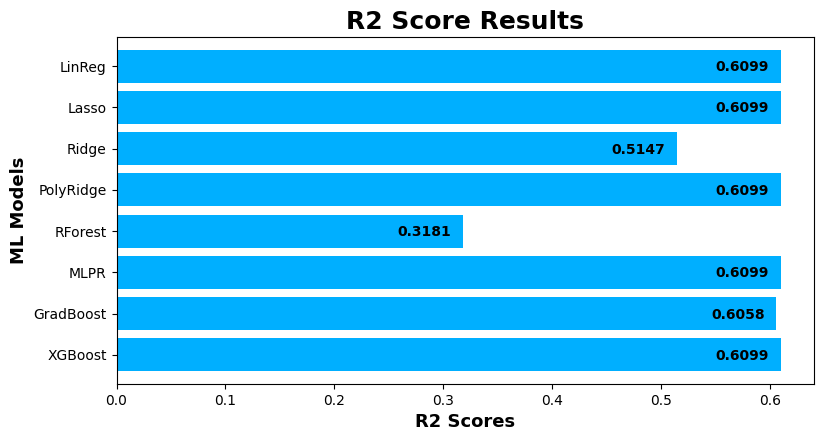

In [55]:
plt.figure(figsize=(9,4.5))
plt.barh(range(8), res_r2, color='#00afff')
plt.title("R2 Score Results", fontsize=18, fontweight='bold')
plt.yticks(range(8), methods)
plt.ylim(7.7,-0.7)
plt.xlabel('R2 Scores', fontsize=13, fontweight='bold')
plt.ylabel('ML Models', fontsize=13, fontweight='bold')
for i in range(8):
    plt.text(res_r2[i]-0.06, i+0.12, "{:.4f}".format(res_r2[i]), fontweight='bold')
plt.show()

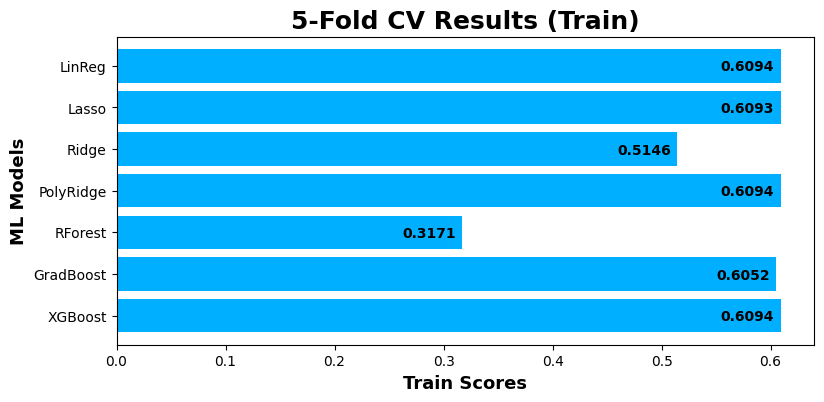

In [56]:
plt.figure(figsize=(9,4))
plt.barh(range(7), res_cv_train, color='#00afff')
plt.title("5-Fold CV Results (Train)", fontsize=18, fontweight='bold')
plt.yticks(range(7), methods[:5]+methods[6:])
plt.ylim(6.7,-0.7)
plt.xlabel('Train Scores', fontsize=13, fontweight='bold')
plt.ylabel('ML Models', fontsize=13, fontweight='bold')
for i in range(7):
    plt.text(res_cv_train[i]-0.055, i+0.12, "{:.4f}".format(res_cv_train[i]), fontweight='bold')
plt.show()

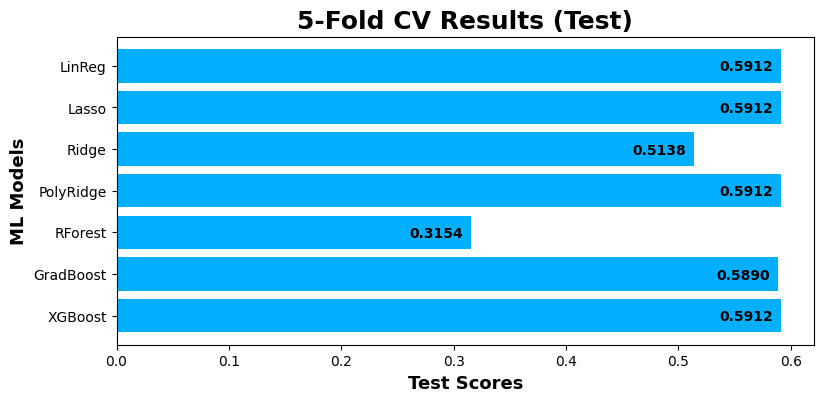

In [57]:
plt.figure(figsize=(9,4))
plt.barh(range(7), res_cv_test, color='#00afff')
plt.title("5-Fold CV Results (Test)", fontsize=18, fontweight='bold')
plt.yticks(range(7), methods[:5]+methods[6:])
plt.ylim(6.7,-0.7)
plt.xlabel('Test Scores', fontsize=13, fontweight='bold')
plt.ylabel('ML Models', fontsize=13, fontweight='bold')
for i in range(7):
    plt.text(res_cv_test[i]-0.055, i+0.12, "{:.4f}".format(res_cv_test[i]), fontweight='bold')
plt.show()